<a href="https://colab.research.google.com/github/z-xylym/LSTM-learning/blob/main/LSTM2_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [73]:
from google.colab import auth
auth.authenticate_user()

# 新段落

In [3]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [10]:
zip_file_path = '/content/archive (1).zip'

In [11]:
import zipfile
import os

# 指定 ZIP 文件路径
zip_file_path = '/content/archive (1).zip'

# 指定解压目标路径
extraction_path = '/content/drive/MyDrive/speech emotion files'

# 确保目标目录存在
os.makedirs(extraction_path, exist_ok=True)

# 解压 ZIP 文件
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print('Dataset extracted to', extraction_path)

Dataset extracted to /content/drive/MyDrive/speech emotion files


In [12]:
import os

# 列出解压目录中的文件
extraction_path = '/content/drive/MyDrive/speech emotion files'
files_list = os.listdir(extraction_path)

# 打印文件列表
print('Files extracted:')
for file in files_list:
    print(file)

Files extracted:
Actor_01
Actor_02
Actor_03
Actor_04
Actor_05
Actor_06
Actor_07
Actor_08
Actor_09
Actor_10
Actor_11
Actor_12
Actor_13
Actor_14
Actor_15
Actor_16
Actor_17
Actor_18
Actor_19
Actor_20
Actor_21
Actor_22
Actor_23
Actor_24
audio_speech_actors_01-24


In [13]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [48]:
import shutil
import os

# 指定要删除的多个文件夹路径
folders_to_delete = [
    '/content/drive/MyDrive/renamed_speech_files',
    # 添加更多文件夹路径
]

# 遍历并删除每个文件夹
for folder in folders_to_delete:
    if os.path.exists(folder):
        # 删除文件夹及其所有内容
        shutil.rmtree(folder)
        print(f"Folder '{folder}' and all its contents have been deleted.")
    else:
        print(f"Folder '{folder}' does not exist.")

Folder '/content/drive/MyDrive/renamed_speech_files' and all its contents have been deleted.


In [49]:
import os
import shutil

# 旧数据集路径
old_root = "/content/drive/MyDrive/speech emotion files"
# 新数据集路径
new_root = "/content/drive/MyDrive/renamed_speech_emotion_files"

# 确保新路径存在
os.makedirs(new_root, exist_ok=True)

# 情感映射表
emotion_dict = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# 遍历所有文件
for dirname, _, filenames in os.walk(old_root):
    for filename in filenames:
        if filename.endswith(".wav"):
            # 移除扩展名并拆分
            name_without_ext = filename.replace(".wav", "")
            parts = name_without_ext.split("-")

            # 确保文件名格式正确
            if len(parts) < 7:
                print(f"Skipping invalid filename: {filename}")
                continue

            try:
                # 获取情感编号
                emotion_code = parts[2]
                # 获取对应的情感标签
                emotion_label = emotion_dict.get(emotion_code, "unknown")

                # 生成新文件名（在最后加上情感标签）
                new_filename = f"{name_without_ext}_{emotion_label}.wav"

                # 计算新文件路径
                old_path = os.path.join(dirname, filename)
                new_path = os.path.join(new_root, new_filename)

                # 复制并重命名文件
                shutil.copy(old_path, new_path)

            except Exception as e:
                print(f"Error processing file {filename}: {e}")

print("All files have been renamed and copied to the new folder.")



All files have been renamed and copied to the new folder.


In [50]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/renamed_speech_emotion_files'):
    for filename in filenames:
        if filename.endswith('.wav'):  # 确保只处理音频文件
            paths.append(os.path.join(dirname, filename))

            # 直接提取最后一个 "_" 后的部分作为情感标签
            label = filename.replace('.wav', '').split('_')[-1]  # 取最后一部分
            labels.append(label.lower())  # 确保标签小写

print('Dataset is Loaded')


Dataset is Loaded


In [51]:
paths[:5]

['/content/drive/MyDrive/renamed_speech_emotion_files/03-01-01-01-01-01-01_neutral.wav',
 '/content/drive/MyDrive/renamed_speech_emotion_files/03-01-01-01-01-02-01_neutral.wav',
 '/content/drive/MyDrive/renamed_speech_emotion_files/03-01-01-01-02-01-01_neutral.wav',
 '/content/drive/MyDrive/renamed_speech_emotion_files/03-01-01-01-02-02-01_neutral.wav',
 '/content/drive/MyDrive/renamed_speech_emotion_files/03-01-02-01-01-01-01_calm.wav']

In [53]:

labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'calm']

In [54]:
##create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/renamed_speech_emotion_...,neutral
1,/content/drive/MyDrive/renamed_speech_emotion_...,neutral
2,/content/drive/MyDrive/renamed_speech_emotion_...,neutral
3,/content/drive/MyDrive/renamed_speech_emotion_...,neutral
4,/content/drive/MyDrive/renamed_speech_emotion_...,calm


In [55]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [57]:
extract_mfcc(df['speech'][0])

array([-6.7019543e+02,  6.5063850e+01,  8.8895512e-01,  1.4715979e+01,
        9.1821642e+00,  6.6057575e-01, -3.8468370e+00, -3.5839450e+00,
       -1.2959006e+01, -3.3001332e+00,  9.1078073e-01, -3.5970366e+00,
        2.3762751e+00, -4.3889418e+00,  5.4507941e-01,  8.9185250e-01,
       -4.8025899e+00, -2.1054146e+00, -1.6059679e+00, -1.0523908e+00,
       -7.0672808e+00, -6.2306041e-01, -2.7280304e+00, -5.3073597e+00,
       -1.9691169e+00, -9.4615275e-01, -5.7211108e+00,  3.3299059e-01,
       -2.5438445e+00,  1.8220794e-01, -2.3510973e+00, -2.5047276e+00,
       -3.1515059e+00, -2.1908991e+00, -3.8017609e+00, -1.8130866e+00,
       -1.2612234e+00, -2.1449544e+00, -4.1521721e+00, -1.7796160e+00],
      dtype=float32)

In [58]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [59]:

X_mfcc

,speech
0,"[-670.19543, 65.06385, 0.8889551, 14.715979, 9..."
1,"[-660.23035, 63.325817, -2.6304574, 17.983355,..."
2,"[-661.9645, 66.65587, -0.9321571, 14.899039, 5..."
3,"[-657.72235, 65.03519, 3.1486716, 15.666512, 7..."
4,"[-694.5796, 72.531715, 3.1045644, 17.112114, 9..."
...,...
1435,"[-554.5564, 28.574038, -20.387833, -1.9823042,..."
1436,"[-472.07373, 49.37256, -19.427317, -7.931482, ..."
1437,"[-477.47406, 38.98995, -24.028769, -4.061717, ..."
1438,"[-444.81973, 29.430103, -7.319827, 2.1825602, ..."


In [60]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1440, 40)

In [61]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [62]:

y = y.toarray()

In [63]:
y.shape()

TypeError: 'tuple' object is not callable

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,864 (1.17 MB)

 Trainable params: 305,864 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step - accuracy: 0.1384 - loss: 2.0696 - val_accuracy: 0.1558 - val_loss: 2.0457
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.1877 - loss: 2.0195 - val_accuracy: 0.2294 - val_loss: 1.9670
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.2237 - loss: 1.9453 - val_accuracy: 0.1905 - val_loss: 1.9499
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.2565 - loss: 1.8960 - val_accuracy: 0.2165 - val_loss: 1.9247
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.2849 - loss: 1.8808 - val_accuracy: 0.2035 - val_loss: 1.9335
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.2834 - loss: 1.8564 - val_accuracy: 0.2511 - val_loss: 1.9137
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.2734 - loss: 1.8331 - val_accuracy: 0.2381 - val_loss: 1.8517
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.2727 - loss: 1.8494 - val_accuracy: 0.

In [67]:
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [68]:
predicted_labels = np.argmax(y_pred, axis=1)

In [69]:
true_labels = np.argmax(y_test, axis=1)

In [70]:
from sklearn.metrics import classification_report
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.37      0.43      0.40        42
           1       0.48      0.55      0.51        44
           2       0.27      0.47      0.34        32
           3       0.50      0.56      0.53        32
           4       0.21      0.29      0.25        34
           5       0.00      0.00      0.00        20
           6       0.24      0.18      0.21        39
           7       0.65      0.24      0.35        45

    accuracy                           0.36       288
   macro avg       0.34      0.34      0.32       288
weighted avg       0.37      0.36      0.35       288



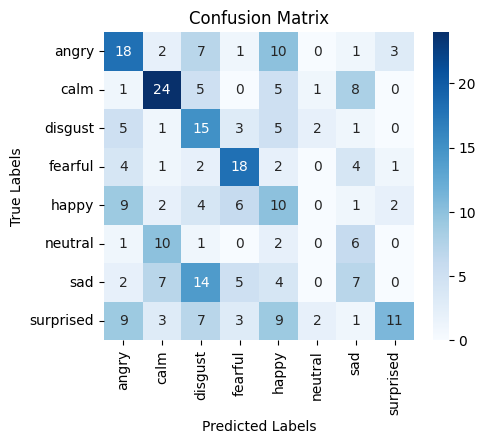

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=enc.categories_[0], yticklabels=enc.categories_[0])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [72]:
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)


Accuracy: 0.3576388888888889
